# Data Exploration

The data were collected in two secondary schools in the Alentejo region of Portugal, using school reports and questionnaires. The data were cleaned to only include students for which all the variables are known - and a further 111 students were discarded because of mismatched information between the surveys and the schoool reports. The data come with a file containing attribute information, which is described as follows:

#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - \<15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - \<2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1\<=n\<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20) (Math or Portuguese)
31. G2 - second period grade (numeric: from 0 to 20) (Math or Portuguese)
32. G3 - final grade (numeric: from 0 to 20, output target) (Math or Portuguese)

Many of these variables will come in handy when attempting to control for ability; age and parental education status are often valuable in estimating ability. The data include three variables for grades, but in our analysis we will only use `G3 - final grade`. `G3` will be our dependent variable, we will not include `G1` and `G2` as independent variables because of issues with dependence that could potentially arise.

The data come in two packets, one relating to Math classes, and one to Portuguese classes. The Portuguese data has 649 observations (649 students) and the math data has 395 observations. We will only use the Portuguese data (due to the higher number of observations). It would have been interesting to use both sets of data and compare individual students' performance in different types of classes, but we have no unique identifiers across the two data sets.

Let's start by looking at a couple observations.

In [2]:
# Loading the libraries we will use and setting global options

# Data manipulation and math/stats functions
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import statsmodels.api as sm
from linearmodels.iv import IV2SLS 

# Plotting preferences
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

# Suppressing warnings
import warnings
warnings.simplefilter(action = "ignore")

# Import self-made functions
from p3functions import *

/Users/chitwan/anaconda/envs/study/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Importing the data
student_perf = pd.read_table('data/student-por.csv', sep = ';')

# Looking at the first five observations
student_perf.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


Now that we know that our data were read in correctly, lets look at some summary statistics and visualizations of the quantative variables in our data.

In [4]:
# Brief tabular summary of descriptive statistics of the quantatative data
student_perf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [5]:
# Two-way frequency table of traveltime to reason
two_way(student_perf, 'traveltime', 'reason')

,course,home,other,reputation
1,144,100,36,86
2,99,42,24,48
3,31,4,10,9
4,11,3,2,0


Since "close to home" is among the reasons students may choose to take a course, it follows that 'traveltime' and 'reason' may have some relationship. The above two-way frequency displays the number of student in each pair of categories.

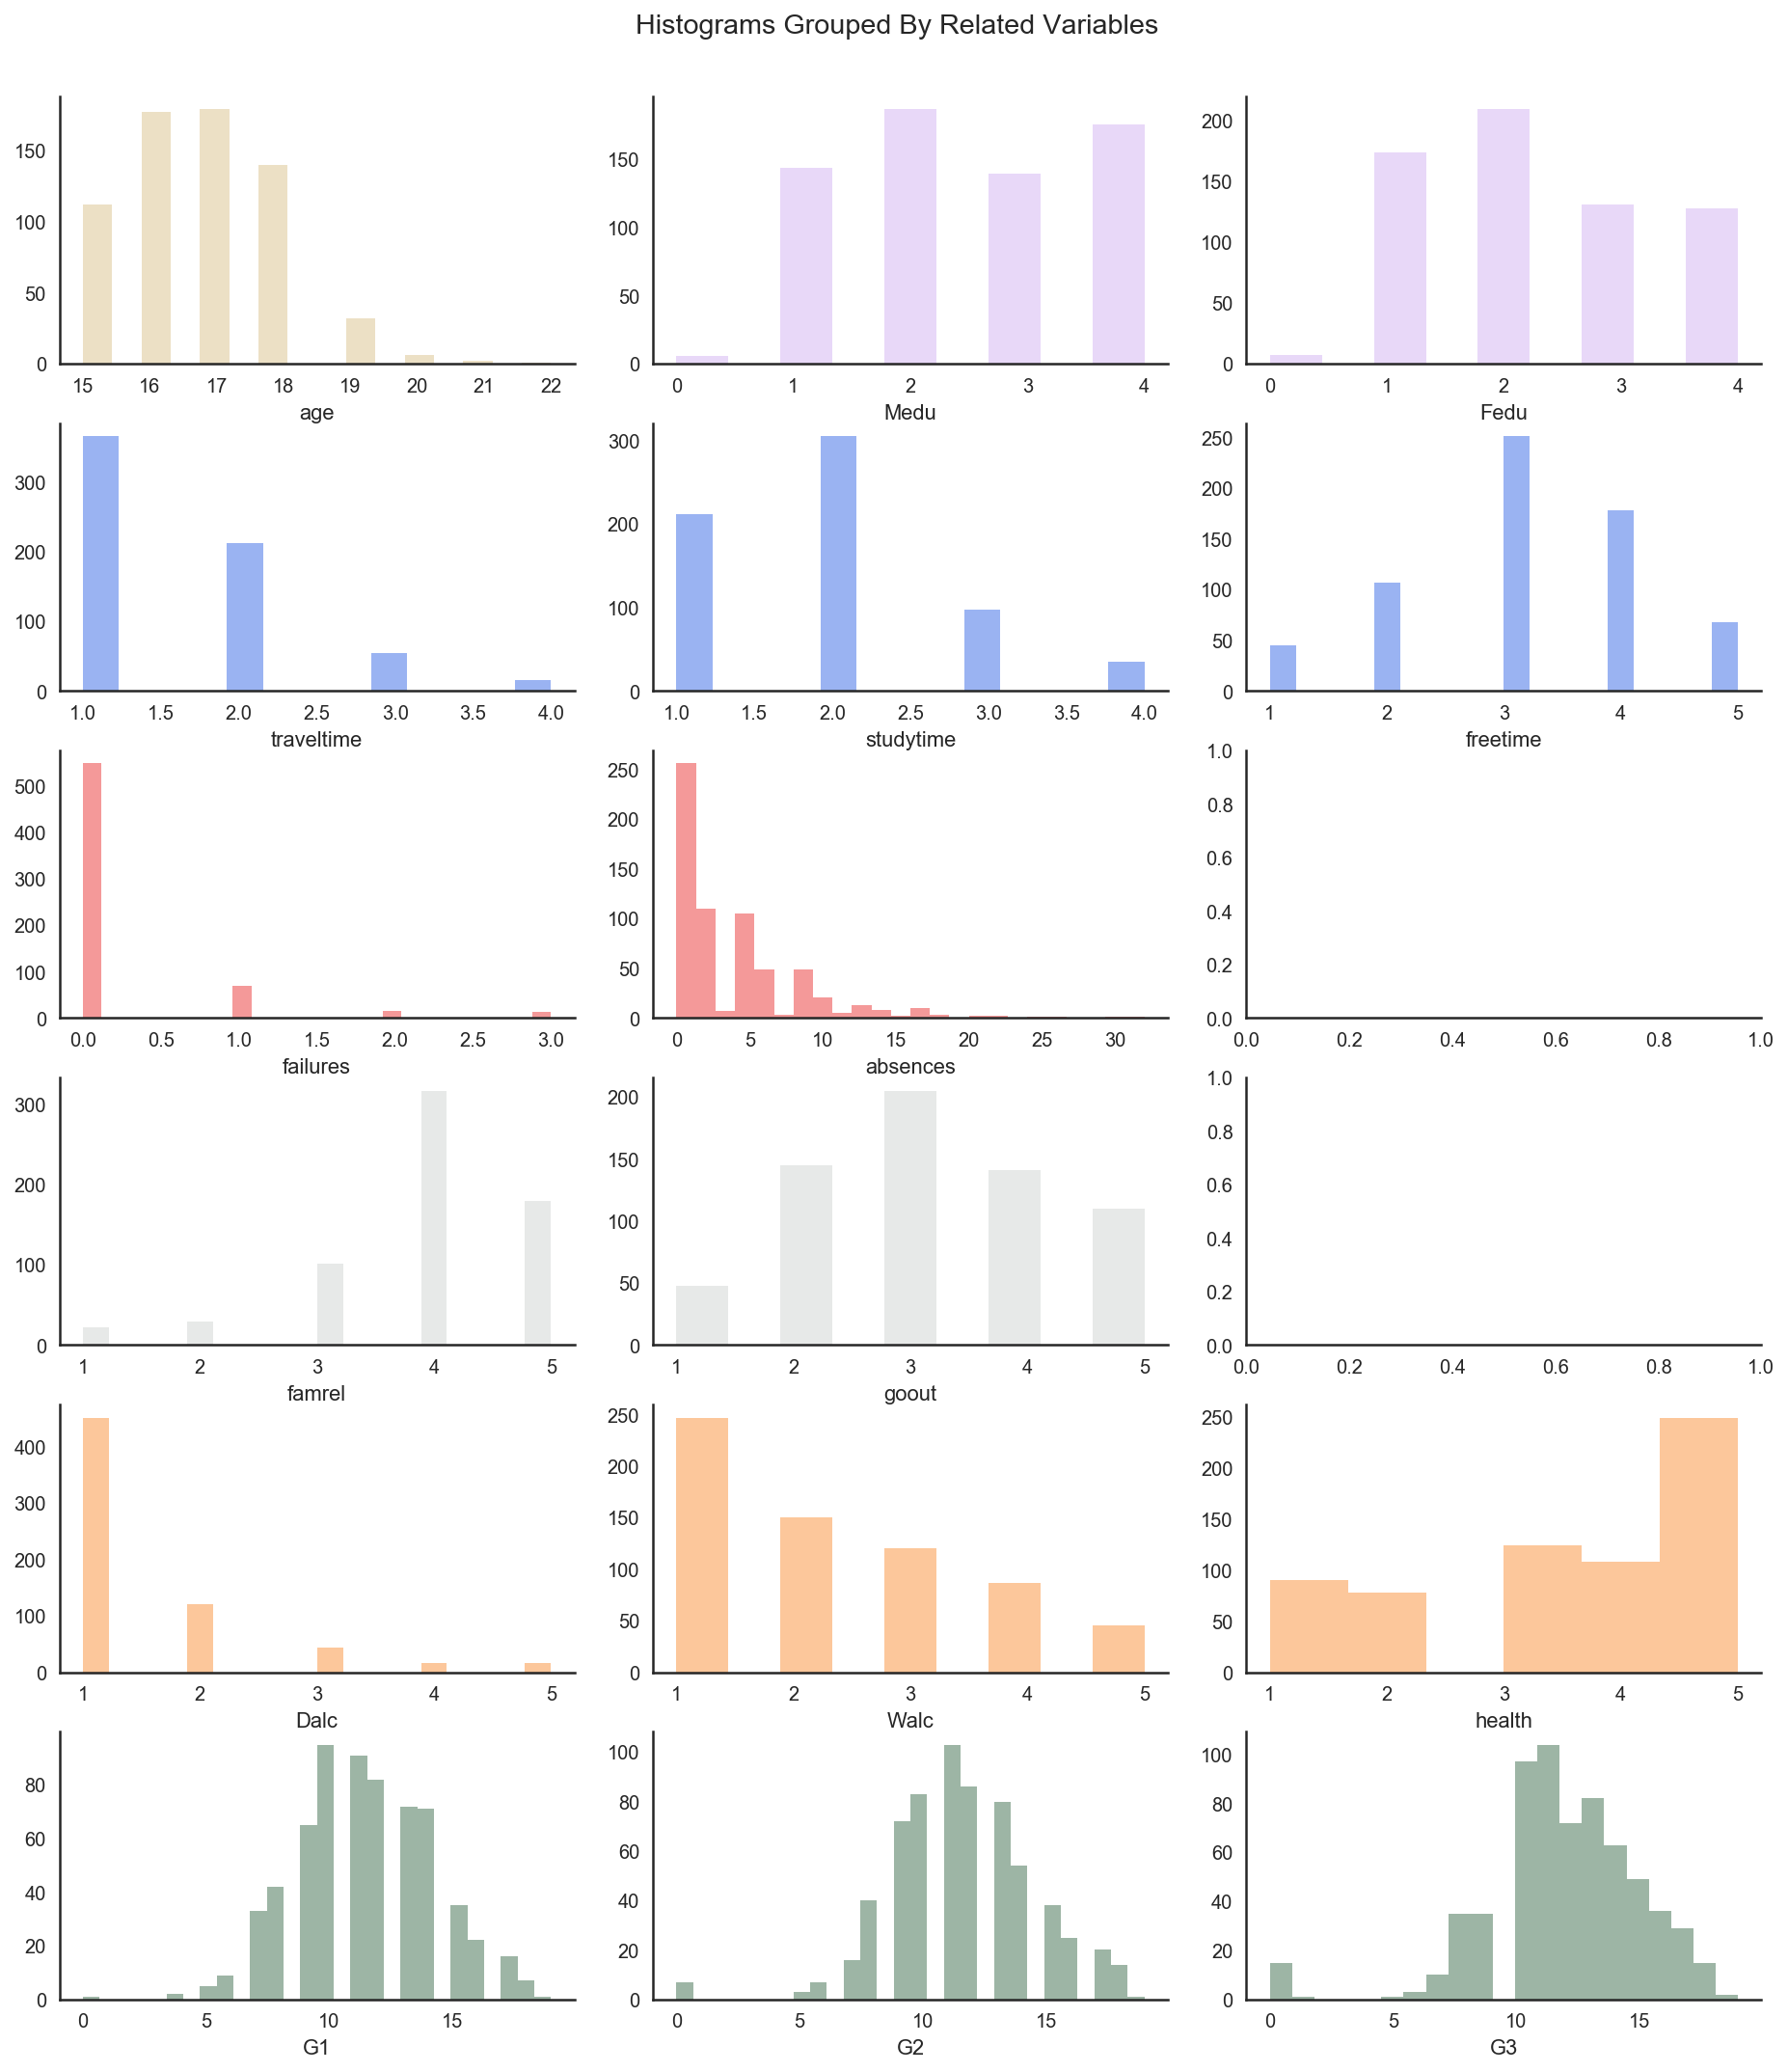

In [6]:
# Plotting histogram of quantitative variables
# Similar variables grouped by color (e.g.: mother's and father's education)
colors = {
    'age': 'tan',
    'Medu': 'lavender',
    'Fedu': 'lavender',
    'traveltime': 'blue',
    'studytime': 'blue',
    'freetime': 'blue',
    'failures': 'red',
    'absences': 'red',
    'famrel': 'silver',
    'goout': 'silver',
    'Dalc': 'orange',
    'Walc': 'orange',
    'health': 'orange',
    'G1': 'pine green',
    'G2': 'pine green',
    'G3': 'pine green'
}
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(6, 3, figsize=(13, 15), sharex=False)
f.tight_layout()
f.subplots_adjust(top=0.94)
f.suptitle('Histograms Grouped By Related Variables')

sns.despine()
r = 0
c = 0
for k,v in colors.items():
    sns.distplot(student_perf[k], kde=False, color=sns.xkcd_rgb[v], ax=axes[r,c])
    if c < 2 and k not in ['absences', 'goout']:
        c += 1
    else:
        r += 1
        c = 0

f.savefig('fig/quantvar_hist.png');

While these histograms give us some information about the distributions of these individual variables, they don't help with understanding how these variables interact with our dependent variable `G3`. So lets look at some violin plots to visualize some of these interactions. 

For the violin plots we split `G3` into 5 bins to more clearly visualize the interactions.
We also show the distributions relative to which school the students come from to determine whether there is a difference in the two schools.

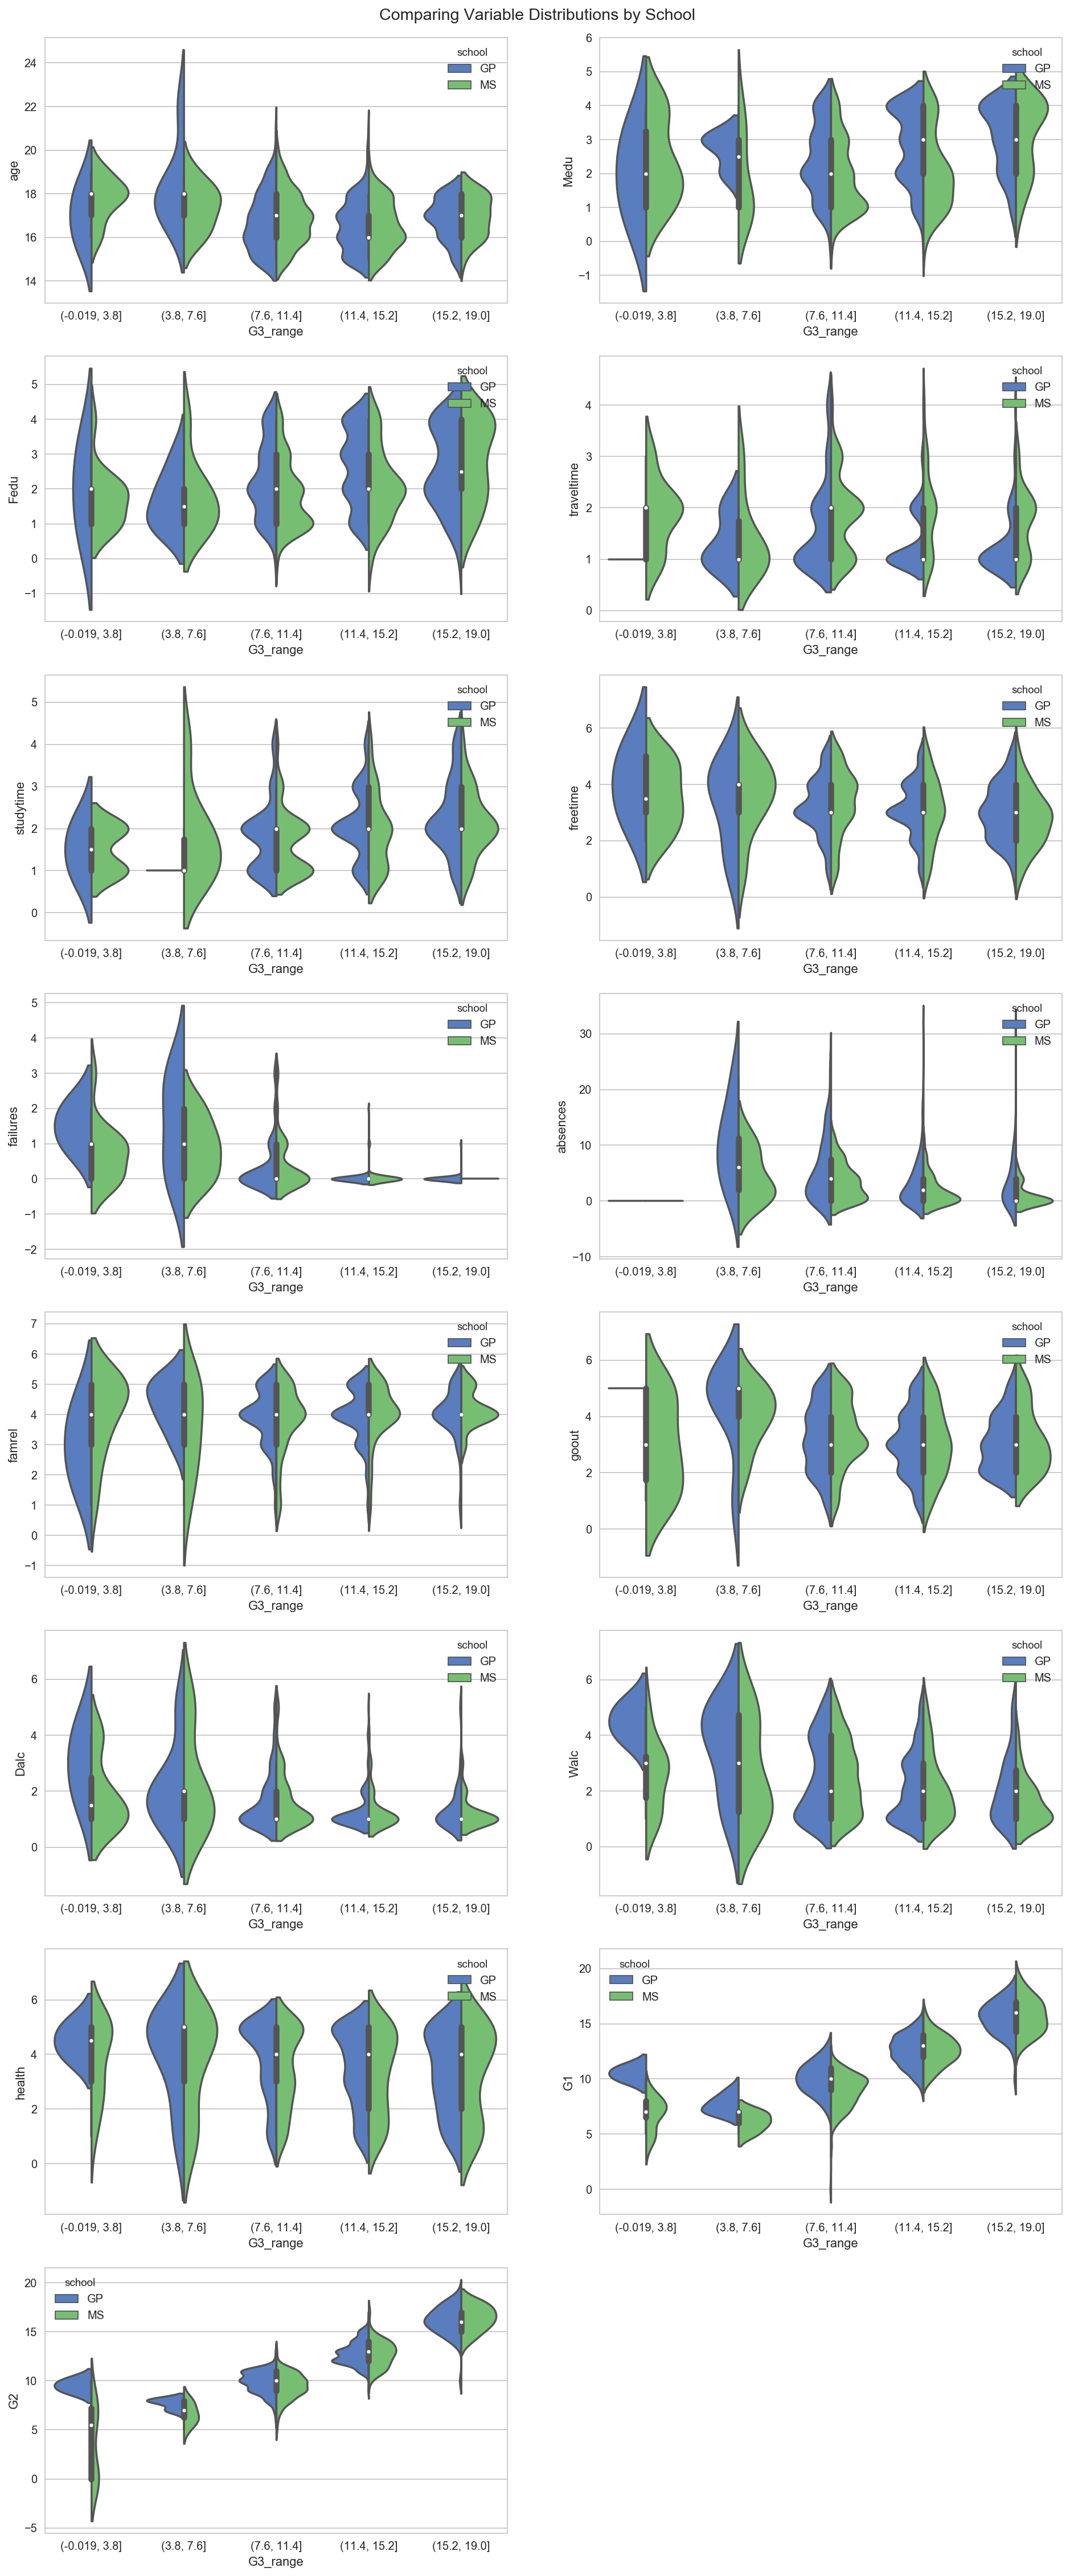

In [12]:
# Splitting G3 into ranges to get a cleaner visual
student_perf['G3_range'] = pd.cut(student_perf.G3, 5, retbins = True)[0]

# Creating the plots
plt.figure(figsize=(16, 36))
sns.set(style="whitegrid", palette="muted", color_codes=True)

plt.subplots_adjust(top=0.97)
plt.suptitle('Comparing Variable Distributions by School')

sns.despine()
for column_index, column in enumerate(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'freetime', 'failures', 
                                       'absences', 'famrel', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2']):
    if column == 'G3_range':
        continue
    plt.subplot(8, 2, column_index + 1)
    sns.violinplot(x='G3_range', y=column, hue = 'school', split = True, data=student_perf)
    
plt.savefig('fig/distrbyschool.png');

It is reassuring to see that the distributions for the two different high schools are somewhat close in most of the plots. The differencs in distributions can be explained by the fact that in Portugal, high schools are concentrated in a particular subject (ie. theater, math, etc.) 

Note that `G1` and `G2` are very predictive of `G3`, which strengthens the idea that we should not include them as covariates (because they would drown out study time and are partly determined by study time).

In [25]:
# Saving the pandas dataframe
student_perf.to_pickle('data/student_por_v2.pkl')